In [221]:
# import tidy format data CSV
# run PCA-->kmeans without spatial data (ie X,Y,Z coords)
# plot PCA and kmeans 

import pandas as pd

# Load the CSV file
# pathname = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/scripts/matlab-copy/September 2024/'
# filename = 'analysisData_091724.csv'
# df = pd.read_csv(pathname+filename)

pathname = '/Users/jcoleman/Documents/GitHub/NMCoop_Shared/#Pizzi/'
# filename = 'df_forpca.csv' # 'df_for_pca_clean_noXYZ.csv'
filename = 'df_for_pca_clean.csv' #w/ XYZ
df_for_pca = pd.read_csv(pathname+filename)

filename = 'df_pca_withIDs.csv'
df_for_pca_IDs = pd.read_csv(pathname+filename)
# df_for_pca_IDs = df_for_pca.copy() # trying to get group and vessel IDs encoded -s ee boxplot data?
df_for_pca_IDs['group'] = df_for_pca_IDs['group'].map({'A': 1, 'B': 2})

print(df_for_pca_IDs['group'])
print(df_for_pca_IDs.shape)
print(df_for_pca['Z'])
print(df_for_pca.shape)



0      1
1      1
2      1
3      1
4      1
      ..
185    2
186    2
187    2
188    2
189    2
Name: group, Length: 190, dtype: int64
(190, 28)
0      10.0
1      20.0
2      25.0
3      55.0
4      15.0
       ... 
185    40.0
186    50.0
187    85.0
188    30.0
189     5.0
Name: Z, Length: 190, dtype: float64
(190, 11)


In [222]:
# # dfTable = pd.read_table(pathname+filename)

# # print(dfTable.head())

# # Start with your original DataFrame
# df_temp = df_for_pca_IDs.copy()

# # # Ensure NaNs are converted to 0
# # df_temp[['capLogical', 'venLogical', 'artLogical']] = df_temp[['capLogical', 'venLogical', 'artLogical']].fillna(0)

# # # print(df_temp.max())

# # # Directly multiply each logical column by its respective factor
# # df_temp['capLogical'] = df_temp['capLogical'] * 1
# # df_temp['venLogical'] = df_temp['venLogical'] * 2
# # df_temp['artLogical'] = df_temp['artLogical'] * 3

# # # Now, sum the values across the three logical columns row-wise
# # df_sum = df_temp[['capLogical', 'venLogical', 'artLogical']].sum(axis=1).to_frame('totalLogical')

# # # Output the result
# # print(df_sum.max())
# # print(df_sum)


# # # print(df_temp['capLogical'].max())
# # # print(df_temp['venLogical'])
# # # print(df_temp['artLogical'])
# # print(df_sum['totalLogical'])

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Ensure there are no duplicated rows/indices
# final_df = final_df.drop_duplicates()

# # Plotting each vessel type with boxplots, ensuring values are not duplicated
# # g = sns.catplot(
#     x='group', 
#     y='metric1', 
#     hue='vessel_type', 
#     data=final_df[final_df['vessel_type'].isin(['capillary', 'venule', 'arteriole'])], 
#     kind='box', 
#     width=0.5,  # Adjust boxplot width (~50-70% of original)
#     dodge=True  # Add gap between vessel types
# )

# # Customize the plot
# g.set_axis_labels("Group", "Metric1")
# g.add_legend(title="Vessel Type")
# plt.show()


In [232]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_pca(data, n_components=2):
    """
    Perform PCA on the provided data and return the PCA transformed data.
    
    Parameters:
    data (DataFrame or ndarray): Input data for PCA.
    n_components (int): Number of principal components to return.
    
    Returns:
    DataFrame: PCA transformed data with specified number of components.
    """
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_scaled)
    
    # Convert to DataFrame
    columns = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=principal_components, columns=columns)
    
    return pca_df

from sklearn.cluster import KMeans

def perform_kmeans(pca_data, n_clusters=3):
    """
    Perform K-means clustering on the PCA transformed data.
    
    Parameters:
    pca_data (DataFrame or ndarray): PCA transformed data.
    n_clusters (int): Number of clusters for K-means.
    
    Returns:
    DataFrame: Original PCA data with an additional 'Cluster' column for K-means results.
    """
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(pca_data)
    
    pca_data['Cluster'] = clusters
    
    return pca_data

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_pca(pca_data, title='PCA Results'):
    """
    Plot the PCA results.
    
    Parameters:
    pca_data (DataFrame): PCA transformed data with optional 'group' column for color-coding.
    title (str): Title of the plot.
    """
    
    colors = ['red', 'black']
    cmap = ListedColormap(colors)
    bounds = [0.5, 1.5, 2.5]
    norm = BoundaryNorm(bounds, len(colors))   
    
    plt.figure(figsize=(8, 6))
    if 'group' in pca_data.columns:
#         scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['group'], cmap='viridis', alpha=0.7)
        scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['group'],
                              cmap=cmap, norm=norm, alpha=0.7)

        plt.colorbar(scatter, label='Group')
    else:
        plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.7)
        
    plt.xlim(-7, 7)  # Match x-axis range
    plt.ylim(-5, 15)  # Match -axis range
    
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.show()

def plot_kmeans(pca_data, pca_metadata, title='K-means Clustering Results'):
    """
    Plot the K-means clustering results.
    
    Parameters:
    pca_data (DataFrame): PCA transformed data with 'Cluster' column for K-means results.
    title (str): Title of the plot.
    """
    
#     get color code from group or logicals using - pca_metadata input
    plt.figure(figsize=(8, 6))
#     scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Cluster'], cmap='viridis', alpha=0.7)
    scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_metadata, cmap='viridis', alpha=0.7)

    # pca_colors
    plt.colorbar(scatter, label='Cluster')
#     plt.colorbar(scatter, label='Group')
#     plt.colorbar(scatter, label='Vessel type')

    
    plt.xlim(-7, 7)  # Match x-axis range
    plt.ylim(-5, 15)  # Match -axis range
    
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.show()
    
def plot_kmeans_custom(pca_data, pca_metadata, colors, title='K-means Clustering Results'):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    import numpy as np

    # Define the color map dictionary
    color_map = {
        (True, False, False): (0.26, 0.59, 0.86),  # capillary (0.26, 0.59, 0.86)
        (False, True, False): (0.86, 0.93, 0.23),  # venule (0.86, 0.93, 0.23)
        (False, False, True): (0.99, 0.43, 0.24),  # arteriole (0.99, 0.43, 0.24)
    }

    # Example pca_metadata with logicals (you will replace this with your actual metadata)
    # pca_metadata example (logical columns or group values)
    pca_metadata = [
        (True, False, False),  # capillary
        (False, True, False),  # venule
        (False, False, True),  # arteriole
        (True, False, False),  # capillary again
    ]

    # Get color for each logical group based on the `color_map`
    colors = [color_map[tuple(group)] for group in pca_metadata]

    # Create a custom colormap (optional, in case you want to use it for other plots)
    cmap = ListedColormap([color_map[key] for key in color_map])

    # Example pca_data (randomly generated for this example)
    pca_data = {'PC1': np.random.rand(4), 'PC2': np.random.rand(4)}

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=colors, alpha=0.7)

    # Step 2: Add custom legend for the groups
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[(True, False, False)], markersize=10, label='Capillary'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[(False, True, False)], markersize=10, label='Venule'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[(False, False, True)], markersize=10, label='Arteriole')
    ]
    
    plt.xlim(-7, 7)  # Match x-axis range
    plt.ylim(-5, 15)  # Match x-axis range

    plt.legend(handles=handles, title="Vessel Types")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.title(title)

    plt.show()






In [224]:
# Assuming 'data' is your original DataFrame without target columns
# numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns #imputed_df.select_dtypes(include=['int64', 'float64']).columns
# df_for_pca = new_df[numeric_cols]#imputed_df[numeric_cols]
# df_for_pca_clean = df_for_pca.dropna()
headers_for_pca = ['meanFWHM', 'stdevFWHM', 'minFWHM', 'maxFWHM', 'meanFeFv', 'stdevFeFv', 'minFeFv', 'maxFeFv', 'Z']

df_for_pca_clean = df_for_pca.copy()[headers_for_pca]


print(df_for_pca_clean)

pca_data = perform_pca(df_for_pca_clean)

# print(numeric_cols)
# print(imputed_df)
print(df_for_pca.shape)
print(df_for_pca_clean.shape)



# pca_data_with_clusters = perform_kmeans(pca_data, n_clusters=3)

# plot_pca(pca_data_with_clusters, title='PCA with Groups')
# plot_kmeans(pca_data_with_clusters, title='K-means Clustering Results')

     meanFWHM  stdevFWHM   minFWHM   maxFWHM  meanFeFv  stdevFeFv   minFeFv  \
0    3.740378   0.120027  3.542297  3.907355  0.301351   0.088444  0.164055   
1    4.100067   0.120158  3.922870  4.245508  0.718676   0.103000  0.559359   
2    6.326261   0.091814  6.202881  6.441604  0.083048   0.026864  0.049834   
3    6.066305   0.070735  5.974274  6.145408  0.849531   0.084406  0.713789   
4    5.886713   0.134211  5.693535  6.101866  0.222588   0.057162  0.110756   
..        ...        ...       ...       ...       ...        ...       ...   
185  5.816519   0.107876  5.646091  5.990243  0.090134   0.028919  0.043783   
186  4.390754   0.234357  4.028063  4.724228  0.873439   0.107320  0.726248   
187  4.813701   0.139542  4.588607  4.998082  0.264818   0.043021  0.183395   
188  4.484175   0.177509  4.274866  4.828402  0.339985   0.071784  0.242373   
189  4.959572   0.172043  4.645450  5.130429  0.542410   0.106330  0.418899   

      maxFeFv     Z  
0    0.406216  10.0  
1    0.

In [225]:
print(pca_data)

          PC1       PC2
0   -0.854438 -2.054969
1    0.015093 -1.173763
2   -2.678278 -0.191746
3   -0.773125  0.636939
4   -2.085805 -0.345961
..        ...       ...
185 -2.460709 -0.526120
186  0.299930 -0.439739
187 -1.606895 -0.911572
188 -1.100722 -1.167794
189 -0.680682 -0.673584

[190 rows x 2 columns]


In [226]:
pca_data_with_clusters = perform_kmeans(pca_data, n_clusters=3)

In [227]:
print(pca_data_with_clusters)
pca_data_with_clusters['Cluster']

          PC1       PC2  Cluster
0   -0.854438 -2.054969        2
1    0.015093 -1.173763        2
2   -2.678278 -0.191746        1
3   -0.773125  0.636939        2
4   -2.085805 -0.345961        2
..        ...       ...      ...
185 -2.460709 -0.526120        2
186  0.299930 -0.439739        2
187 -1.606895 -0.911572        2
188 -1.100722 -1.167794        2
189 -0.680682 -0.673584        2

[190 rows x 3 columns]


0      2
1      2
2      1
3      2
4      2
      ..
185    2
186    2
187    2
188    2
189    2
Name: Cluster, Length: 190, dtype: int32

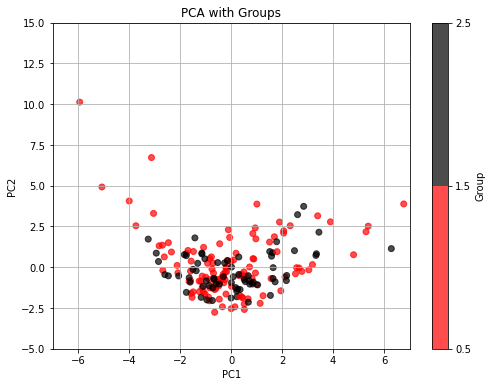

In [233]:
# pca_data_with_clusters['group'] = df_for_pca['group']
pca_data_with_clusters = pca_data_with_clusters.merge(df_for_pca_IDs[['group']], 
                                                      left_index=True, 
                                                      right_index=True)
# black = B-SHAM; red = A-rmTBI
plot_pca(pca_data_with_clusters, title='PCA with Groups')

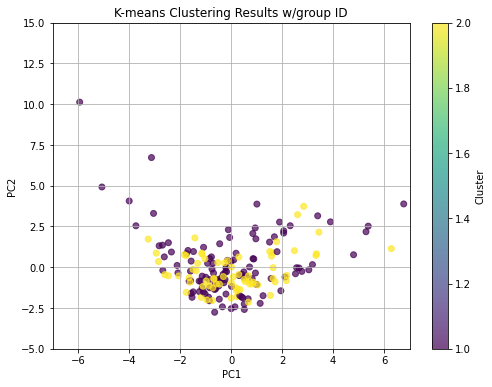

In [229]:
color_source = df_for_pca_IDs['group']
# print(color_source)
plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/group ID')

In [ ]:
# color_source = df_for_pca_IDs['capLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/capLogical')

In [ ]:
# color_source = df_for_pca_IDs['venLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/venLogical')

In [ ]:
# color_source = df_for_pca_IDs['artLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/artLogical')

In [ ]:
# color_source = df_for_pca_IDs['midCapLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/preLogical')

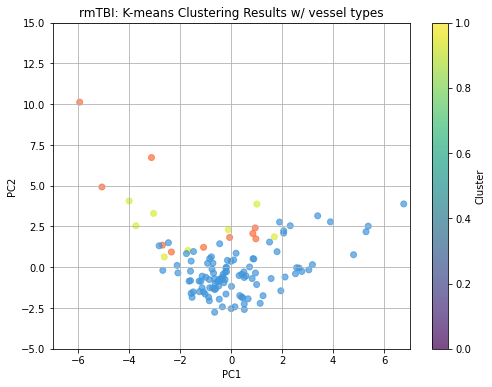

In [234]:
# color_source = df_for_pca_IDs['preCapLogical']
# print(color_source)
# Define color map
# color_map = {
#     (True, False, False): 'red',  # capillary
#     (False, True, False): 'green',  # venule
#     (False, False, True): 'blue',  # arteriole
# }
color_map = {
    (True, False, False): (0.26, 0.59, 0.86),  # capillary (252, 237, 99)
    (False, True, False): (0.86, 0.93, 0.23),  # venule (0.86, 0.93, 0.23)
    (False, False, True): (0.99, 0.43, 0.24),  # arteriole (0.99, 0.43, 0.24)
}

# Convert logical values to colors
colors = [color_map[tuple(x)] for x in zip(df_for_pca_IDs['capLogical'], 
                                            df_for_pca_IDs['venLogical'], 
                                            df_for_pca_IDs['artLogical'])]
colors_df = pd.Series(colors)

# df_output1c = df_output[['rowID'] + headers_to_extract]
colors_A = colors_df[df_for_pca_IDs['group'] == 1]
colors_B = colors_df[df_for_pca_IDs['group'] == 2]


pca_data_with_clusters_PLOTA  = pca_data_with_clusters[df_for_pca_IDs['group'] == 1]
pca_data_with_clusters_PLOTB  = pca_data_with_clusters[df_for_pca_IDs['group'] == 2]


# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ preCapLogical')
plot_kmeans(pca_data_with_clusters_PLOTA, colors_A, title='rmTBI: K-means Clustering Results w/ vessel types')
# plot_kmeans(pca_data_with_clusters_PLOTA, colors_A, title='rmTBI: K-means Clustering Results w/ vessel types')
# print(colors_A)


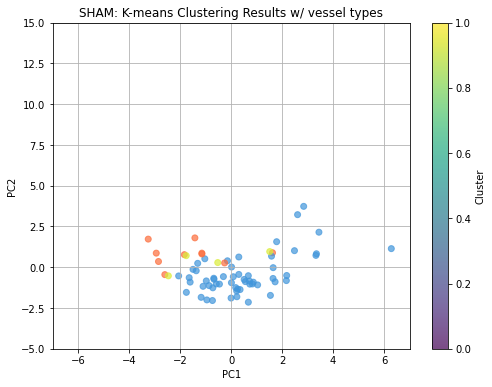

In [235]:
# color_source = df_for_pca_IDs['preCapLogical']
# print(color_source)
# Define color map
# color_map = {
#     (True, False, False): 'red',  # capillary
#     (False, True, False): 'green',  # venule
#     (False, False, True): 'blue',  # arteriole
# }
color_map = {
    (True, False, False): (0.26, 0.59, 0.86),  # capillary (0.26, 0.59, 0.86)
    (False, True, False): (0.86, 0.93, 0.23),  # venule (0.86, 0.93, 0.23)
    (False, False, True): (0.99, 0.43, 0.24),  # arteriole (0.99, 0.43, 0.24)
}

# Convert logical values to colors
colors = [color_map[tuple(x)] for x in zip(df_for_pca_IDs['capLogical'], 
                                            df_for_pca_IDs['venLogical'], 
                                            df_for_pca_IDs['artLogical'])]
colors_df = pd.Series(colors)

# df_output1c = df_output[['rowID'] + headers_to_extract]
colors_A = colors_df[df_for_pca_IDs['group'] == 1]
colors_B = colors_df[df_for_pca_IDs['group'] == 2]


pca_data_with_clusters_PLOTA  = pca_data_with_clusters[df_for_pca_IDs['group'] == 1]
pca_data_with_clusters_PLOTB  = pca_data_with_clusters[df_for_pca_IDs['group'] == 2]


# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ preCapLogical')
plot_kmeans(pca_data_with_clusters_PLOTB, colors_B, title='SHAM: K-means Clustering Results w/ vessel types')
# plot_kmeans(pca_data_with_clusters_PLOTA, colors_A, title='rmTBI: K-means Clustering Results w/ vessel types')
# print(colors_A)


In [251]:
# PLOT W/ CAP POSITION - issues filtering etc - NEED TO SET KEY BEFORE (eg combine logicals for 1,2,3 categories etc)
# &^%^&%&%&^%%%%%%^&%^&%(

# color_source = df_for_pca_IDs['preCapLogical']
# print(color_source)
# Define color map
# color_map = {
#     (True, False, False): 'red',  # capillary
#     (False, True, False): 'green',  # venule
#     (False, False, True): 'blue',  # arteriole
# }
color_map = {
    (True, False, False): (0.26, 0.59, 0.86),  # capillary (252, 237, 99)
    (False, True, False): (0.86, 0.93, 0.23),  # venule (0.86, 0.93, 0.23)
    (False, False, True): (0.99, 0.43, 0.24),  # arteriole (0.99, 0.43, 0.24)
}

# Convert logical values to colors
# colors = [color_map[tuple(x)] for x in zip(df_for_pca_IDs['preCapLogical'], 
#                                             df_for_pca_IDs['midCapLogical'], 
#                                             df_for_pca_IDs['pstCapLogical'])]
df_for_pca_IDs = df_for_pca_IDs.reset_index(drop=True) #reset indices
df_for_pca_IDs = df_for_pca_IDs.loc[~((df_for_pca_IDs['preCapLogical'] == 0) & 
                                      (df_for_pca_IDs['midCapLogical'] == 0) & 
                                      (df_for_pca_IDs['pstCapLogical'] == 0))]

colors = [color_map[tuple(x)] for x in zip(df_for_pca_IDs['preCapLogical'], 
                                            df_for_pca_IDs['midCapLogical'], 
                                            df_for_pca_IDs['pstCapLogical'])] 
#                                             if tuple(x) != (0.0, 0.0, 0.0)]
colors_df = pd.Series(colors)
colors_df = colors_df.reset_index(drop=True)
print(df_for_pca_IDs.shape)
print(colors_df.shape)

# df_output1c = df_output[['rowID'] + headers_to_extract]
colors_A = colors_df[df_for_pca_IDs['group'] == 1]
colors_B = colors_df[df_for_pca_IDs['group'] == 2]


pca_data_with_clusters_PLOTA  = pca_data_with_clusters[df_for_pca_IDs['group'] == 1]
pca_data_with_clusters_PLOTB  = pca_data_with_clusters[df_for_pca_IDs['group'] == 2]

# print(pca_data_with_clusters_PLOTB.shape)

pca_data_with_clusters_PLOTB = pca_data_with_clusters_PLOTB.loc[~((df_for_pca_IDs['preCapLogical'] == 0) & 
                                      (df_for_pca_IDs['midCapLogical'] == 0) & 
                                      (df_for_pca_IDs['pstCapLogical'] == 0))]
# print(pca_data_with_clusters_PLOTB.shape)
# print(colors_B.shape)

# # plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ preCapLogical')
# plot_kmeans(pca_data_with_clusters_PLOTA, colors_A, title='rmTBI: K-means Clustering Results w/ CAP POSITION')
# plot_kmeans(pca_data_with_clusters_PLOTB, colors_B, title='Sham: K-means Clustering Results w/ vessel types')
# # print(colors_A)


(158, 28)
(158,)


/var/folders/bh/28kxn85n7dzd4095hz5d9rpnf092bp/T/ipykernel_22684/2125735033.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pca_data_with_clusters_PLOTA  = pca_data_with_clusters[df_for_pca_IDs['group'] == 1]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
# color_source = df_for_pca_IDs['capLogical', 'venLogical', 'artLogical']
# # print(color_source)
# plot_kmeans(pca_data_with_clusters, color_source, title='K-means Clustering Results w/ vessel types')

In [ ]:
# % plot PC1 v PC2 etc - overlay group, vessel type
# remove X, Y, Z - redo Fe/Fv w/ background ROIs/dff?